# MABSim and SMPyBandits

## First Example

In this notebook, we present a first example of the use of *SMPyBandits* and *MABSim* as the base library for MAB implementartion.

In [1]:
#link to google drive for importing .py files

from importlib.machinery import SourceFileLoader

path = '/'
try:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/My Drive/Colab Notebooks/MultiArmedBandits/MyMAB/'
    mabalgs = SourceFileLoader('mabalgs', path+'mabalgs.py').load_module()
    mabsim = SourceFileLoader('mabsim', path+'mabsim.py').load_module()
    mabplot = SourceFileLoader('mabplot', path+'mabplot.py').load_module()
except:
    import setup

try:
    import SMPyBandits
except:
    !pip install -q SMPyBandits




If you want the speed up brought by numba.jit, try to manually install numba and check that it works (installing llvmlite can be tricky, cf. https://github.com/numba/numba#custom-python-environments
Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...
ERROR: 'resource' module not available, but it is in the standard library.
Have you messed up your Python installation?
Are you on Windows? In this case, it's okay.
Please submit a new bug on https://github.com/SMPyBandits/SMPyBandits/issues/new
If you want the speed up brought by numba.jit, try to manually install numba and check that it works (installing llvmlite can be tricky, cf. https://github.com/numba/numba#custom-python-environments


In [2]:
#Dependencies
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Policies
from SMPyBandits.Policies import UCBalpha, UCB, IndexPolicy
from smab import SafeEpsilonGreedy, SafeUCBalpha

#Simulation
from smab import mabs
from smab import mabplt

ImportError: cannot import name 'SafeEpsilonGreedy' from 'smab' (../../packages/smab/smab\smab.py)

In [0]:
plt.rcParams['figure.figsize'] = (10, 5)

#MAB parameters
means = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.45, 0.55, 0.6])
#means = np.concatenate((np.repeat(0.1, 15), np.repeat(0.7, 5), [0.9]))
k = len(means)

#arms objects
#A = [ExtendedBernoulli(m, maxr=maxr, minr=minr) for m in means]
A = [ExtendedBernoulli(m) for m in means]

maxr = +1.0
minr = -1.0
ampl = maxr - minr

#algorithm
#g = UCBalpha(k, alpha=1.0*ampl)  #alpha is related to the amplitude of rewards
g = UCB(k)

#time-horizon
tau = 3000

#repetitions
n = 1

#window average parameter
win = tau//10

M = mabs(A, g, tau, repetitions=n, window=win, save_only_means=False)
M.run(tqdm_leave=True)

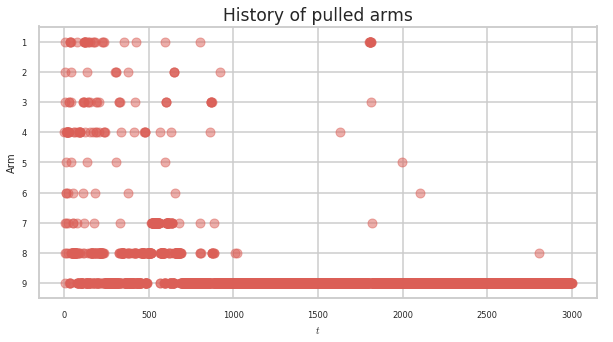

No multialgorithm implementation. Algorithm must be indicated. First algorithm we be displayed.


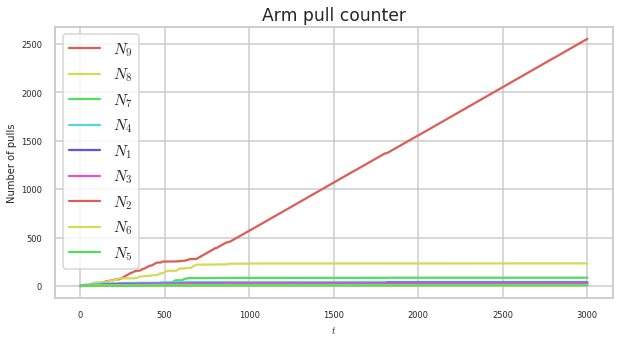

No multialgorithm implementation. Algorithm must be indicated. First algorithm we be displayed.


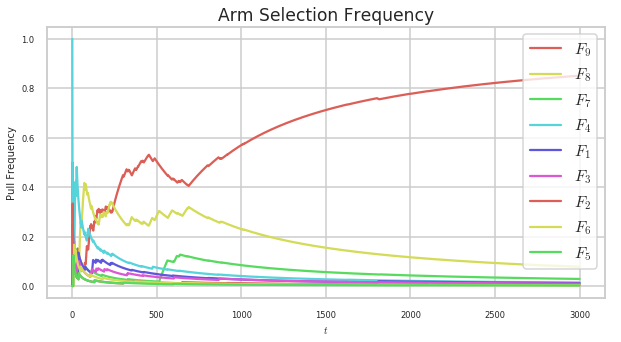

No multialgorithm implementation. Algorithm must be indicated. First algorithm we be displayed.


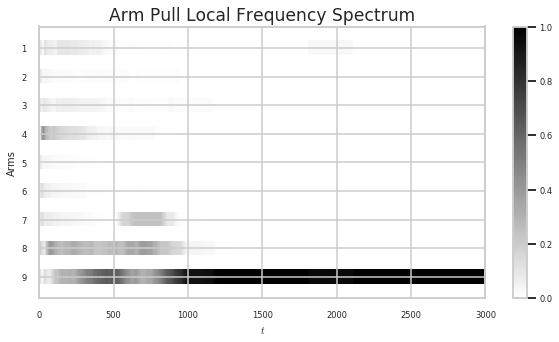

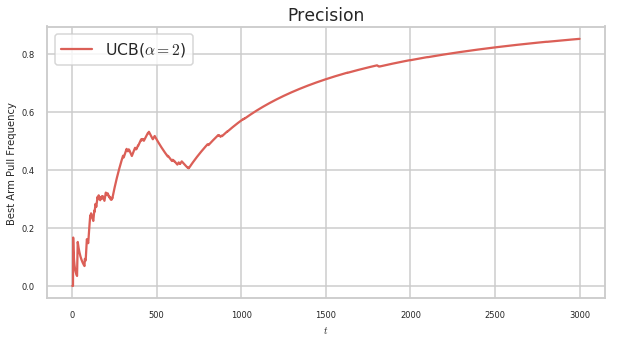

No multialgorithm implementation. Algorithm must be indicated. First algorithm we be displayed.


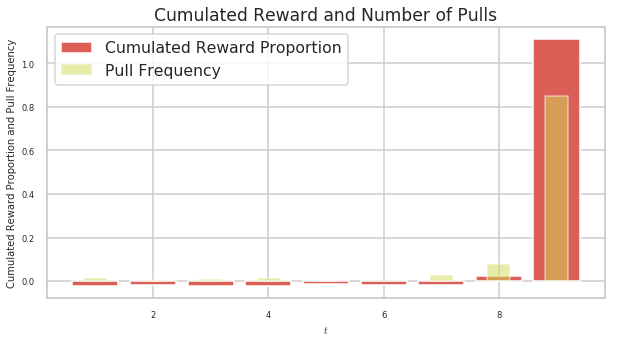

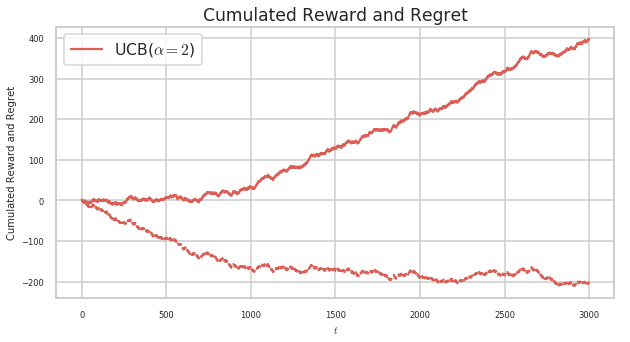

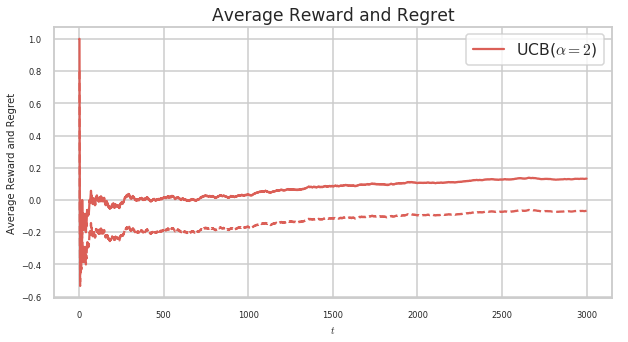

No multialgorithm implementation. Algorithm must be indicated. First algorithm we be displayed.


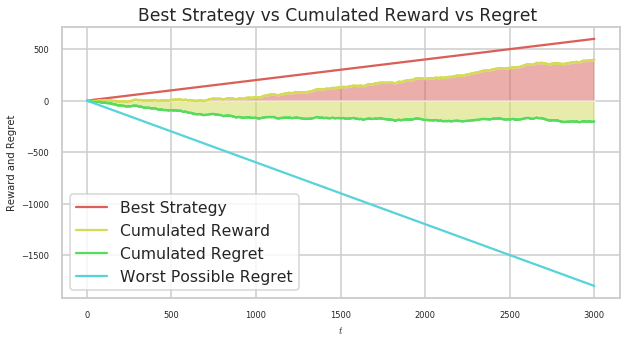

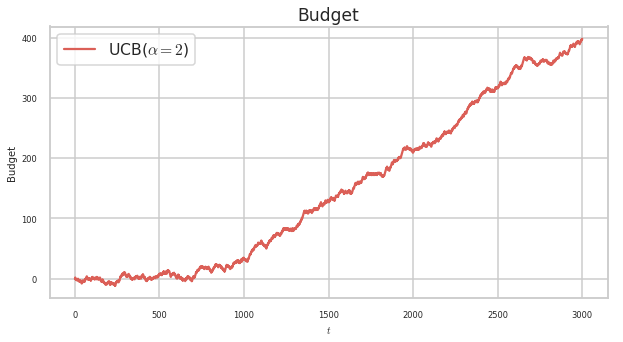

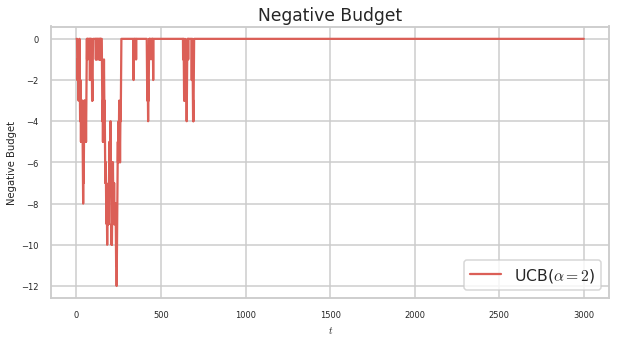

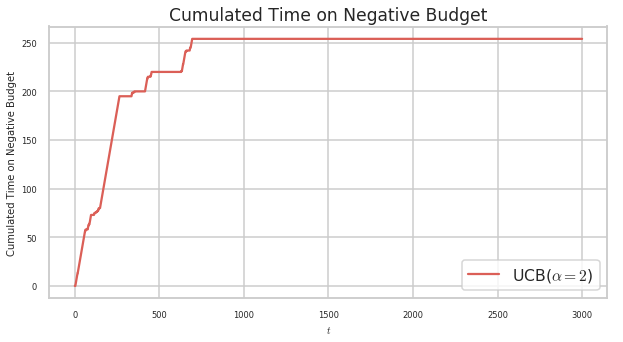

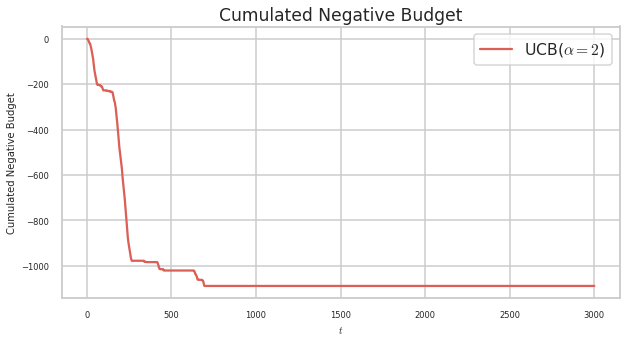

In [0]:
P = mabplt(M)

P.plot_history()

P.plot_action_count_progression()
P.plot_action_freq_progression()
P.plot_action_window_freq_spectrum()
P.plot_precision_progression()

#P.plot_comp_arm_count()
#P.plot_comp_arm_rewards()
P.plot_comp_freq_prop()

P.plot_cumulated_reward_regret_progression()
P.plot_average_reward_regret_progression()

#P.plot_cumulated_reward_progression()
#P.plot_average_reward_progression()
#P.plot_cumulated_regret_progression()
#P.plot_average_regret_progression()
P.plot_reward_regret()

P.plot_budget_progression()
P.plot_negative_budget_progression()
P.plot_negative_budget_time_progression()
P.plot_cumulated_negative_budget_progression()